# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.


<img src="assets/bricks.jpg">


<h1>Import Statements</h1>


In [2]:
import pandas as pd

# Data Exploration


**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.


In [3]:
df = pd.read_csv('data/colors.csv')
df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [4]:
df.groupby('is_trans')['id'].count()

is_trans
f    107
t     28
Name: id, dtype: int64

In [5]:
df.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.


**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets


Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="assets/lego_themes.png">

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png


A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="assets/lego_sets.png ">

**Challenge**: Display this image https://i.imgur.com/whB1olq.png


The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.


In [6]:
df = pd.read_csv('data/sets.csv')

In [7]:
df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [8]:
df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?


In [9]:
first_sets = df.sort_values('year').head()        
first_sets[['name','year']].sort_index().iloc[0]
first_sets[['name','year']].sort_index().head(1)

,name,year
9521,Extra-Large Gift Set (ABB),1949


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?


In [10]:
df.groupby('year').agg({'name' : 'count'}).sort_values(by='year').head(1)


,name
year,
1949,5


In [11]:
df.sort_values('year',ascending=True).head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


**Challenge**: Find the top 5 LEGO sets with the most number of parts.


In [12]:
df[['name','num_parts']].sort_values(by='num_parts',ascending=False).head()

,name,num_parts
15004,The Ultimate Battle for Chima,9987
11183,UCS Millennium Falcon,7541
10551,Hogwarts Castle,6020
295,Taj Mahal,5923
221,Taj Mahal,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?


In [13]:
# df.groupby('year')['set_num'].count()
count_sets = df.year.value_counts()
result = count_sets[2019] - count_sets[1955]
result
df.groupby('year').agg({'name' : 'count'}).head()

,name
year,
1949,5
1950,6
1953,4
1954,14
1955,28


In [14]:
count_sets[1955]

np.int64(28)

In [15]:
count_sets[2019]

np.int64(840)

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.


In [16]:
import matplotlib.pyplot as plt
pivot_df = df.pivot_table(index='year',aggfunc='count')
pivot_df

,name,num_parts,set_num,theme_id
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


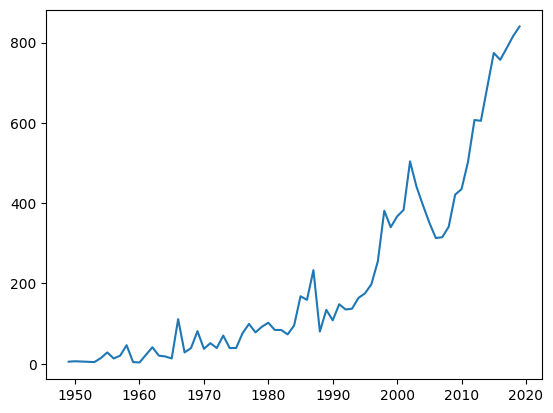

In [17]:
# plt.plot(pivot_df[4:69].set_num)
# plt.plot(pivot_df[-3:-1].set_num)

plt.plot(pivot_df[:-2].set_num)

# plt.plot(pivot_df[4:69])



In [18]:
df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.


In [19]:
df.groupby('year').agg({'theme_id':'count'})

,theme_id
year,
1949,5
1950,6
1953,4
1954,14
1955,28
...,...
2017,786
2018,816
2019,840


In [20]:

# 
df.groupby('year').agg({'theme_id':pd.Series.nunique})


,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


In [21]:
themes_by_year = df.groupby('year').agg({'theme_id':pd.Series.nunique})
themes_by_year.rename(columns= {'theme_id' : 'nr_themes'}, inplace=True)
themes_by_year.head()


,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [22]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).


In [23]:
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


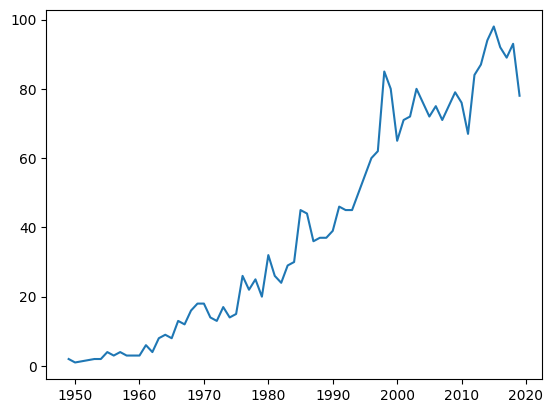

In [24]:
plt.plot(themes_by_year[0:69])

In [25]:
themes_by_year.index[:-2]
themes_by_year.index

Index([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype='int64', name='year')

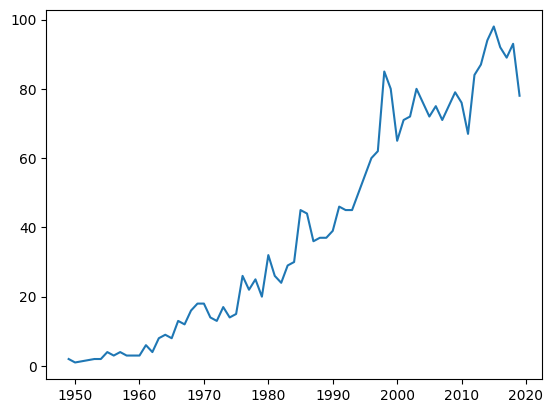

In [26]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

### Line Charts with Two Seperate Axes


Text(0, 0.5, 'Number of Themes')

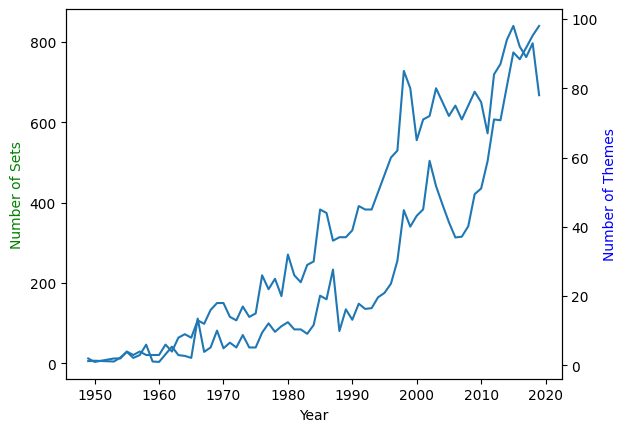

In [27]:
# plt.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2])
# plt.plot(pivot_df[:-2].set_num)
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 
ax1.plot(pivot_df[:-2].set_num)
ax2.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2])
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets',color='green')
ax2.set_ylabel('Number of Themes',color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?


In [28]:
df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [29]:
average_sets = df.groupby('year').agg({'num_parts': 'mean'})
average_sets

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


In [30]:
# avg1 = df.groupby('year').agg({'num_parts': 'mean'}).sort_values(by='year',ascending=True)[4:5]
avg1 = df.groupby('year').agg({'num_parts': pd.Series.mean}).sort_values(by='year',ascending=True)[4:5]
avg1

,num_parts
year,
1955,36.607143


In [31]:
avg2 = df.groupby('year').agg({'num_parts': 'mean'}).sort_values(by='year',ascending=True)[66:67]
avg2 = df.groupby('year').agg({'num_parts': pd.Series.mean}).sort_values(by='year',ascending=True)[66:67]
avg2

,num_parts
year,
2017,221.840967


In [32]:
avg2.iloc[0]['num_parts'] - avg1.iloc[0]['num_parts'] 

np.float64(185.23382406397673)

### Scatter Plots in Matplotlib


**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?


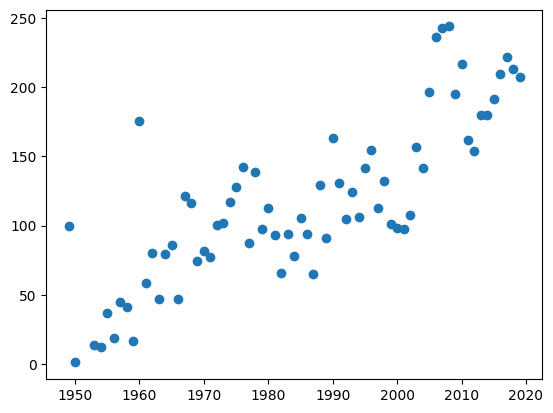

In [33]:
average_sets.index[:-2]
average_sets.values[:-2]
plt.scatter(average_sets.index[:-2],average_sets.values[:-2])

### Number of Sets per LEGO Theme


LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?


In [34]:
set_theme_count = df['theme_id'].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png


### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.


**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)


![alt](assets/rebrickable_schema.png)


In [56]:
theme_df = pd.read_csv('data/themes.csv')
theme_df.shape
theme_df.columns

Index(['id', 'name', 'parent_id'], dtype='object')

In [66]:
theme_df.set_index('name').loc['Star Wars']

,id,parent_id
name,,
Star Wars,18,1.0
Star Wars,158,NaN
Star Wars,209,207.0
Star Wars,261,258.0


In [69]:
theme_df.set_index('name').loc['Star Wars'].count()
theme_df[theme_df.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [70]:
sets_df = pd.read_csv('data/sets.csv')
sets_df.set_index('theme_id').loc[18]
sets_df[sets_df.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


### Merging (i.e., Combining) DataFrames based on a Key
